In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(filepath_or_buffer='data/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.shape

(1067, 13)

In [4]:
#Missing value var mı?

df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

### Data Exploration

In [5]:
# Hangi sütun ne tip veri içeriyor
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [6]:
# Feature Crafting -Extraction
# Paydaşların bize verdiği bilgiler doğrultusunda veri setinde olmayan özellikleri var olmayan özellikleri var olan sütunlardan faydalanarak yaratabiliriz


# Fuel consumption ortalamasını craft edelim

df['FUELCOMSUMPTION_AVG'] = (df['FUELCONSUMPTION_CITY'] + df['FUELCONSUMPTION_HWY'] + df['FUELCONSUMPTION_COMB']) / 3
#Verinin tipi object dönüştüğü için buarada onu tekrar float a dönüştürdük
df['FUELCOMSUMPTION_AVG'] = df['FUELCOMSUMPTION_AVG'].apply(lambda x: f'{x:.1f}').astype(float)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,FUELCOMSUMPTION_AVG
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,8.4
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,9.5
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,5.9
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,11.0
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,10.5


In [7]:
#Power Density Sütunu Yaratalım. CO2EMISSIONS / ENGINESIZE

df['Power_Density'] = df['CO2EMISSIONS'] / df['ENGINESIZE']
df['Power_Density'] = df['Power_Density'].apply(lambda x: f'{x:.1f}').astype(float)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,FUELCOMSUMPTION_AVG,Power_Density
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,8.4,98.0
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,9.5,92.1
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,5.9,90.7
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,11.0,72.9
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,10.5,69.7


In [ ]:
# Veri tipi object olan sütunları saptama ki onları drop edebilelim

# aşağıdaki df.dtypes == np.object_ kodu veri setimizde ki her bir sütunun veri tipine bakarak değer ver,
#  tipi object ise true değilse false döndü. bu bilgileri msk değişimi içerisinde doldurduk
msk = df.dtypes == np.object_
msk


MODELYEAR                   False
MAKE                         True
MODEL                        True
VEHICLECLASS                 True
ENGINESIZE                  False
CYLINDERS                   False
TRANSMISSION                 True
FUELTYPE                     True
FUELCONSUMPTION_CITY        False
FUELCONSUMPTION_HWY         False
FUELCONSUMPTION_COMB        False
FUELCONSUMPTION_COMB_MPG    False
CO2EMISSIONS                False
FUELCOMSUMPTION_AVG         False
Power_Density               False
dtype: bool

In [9]:
categorical_columns = df.columns[msk]
categorical_columns

Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], dtype='object')

In [10]:
# categorical yani object tipindeki sütunları saptadık. şimdi onları droğp edebiliriz
# Not: normal şartlar altında her bir features ın (özelliğine) öneminin ağırlığına bakılır. Biz de burada bu sütunların gereksiz olduğunu bir önem arz etmedğine varsaydık,

# df.drop() satır ya da sütun silmeye yarar
# columns --> argümanına '1' ya da '0' değeri alır. Şayet '1' ise sütun, '0' sa satır sileceği anlamına gelir
# inplace --> argümanı True değeri verdiğimizde yapılan değişiklikler hemen ilgili veri setine yansıtılan demiş oluyoruz 

df.drop(
    columns=['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'],
    index=1,
    inplace=True
)

In [11]:
df.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,FUELCOMSUMPTION_AVG,Power_Density
0,2014,2.0,4,9.9,6.7,8.5,33,196,8.4,98.0
2,2014,1.5,4,6.0,5.8,5.9,48,136,5.9,90.7
3,2014,3.5,6,12.7,9.1,11.1,25,255,11.0,72.9
4,2014,3.5,6,12.1,8.7,10.6,27,244,10.5,69.7
5,2014,3.5,6,11.9,7.7,10.0,28,230,9.9,65.7


In [12]:
# Sınıflama haricindeki diğer regrasyon türlerinde, tahmin edilecek özelliğe etki eden diğer özelliklerin ne kadar etki ettiği yani arasındaki ilişkiyi saptamamız gerekir
# Daha teknik konuşmak gerekirse bağımlı değişkene (dependednt variable) en çok etki eden diğer features (independent variable) saptamaya çalışacağız
# Hatta biz simple linear regression yaptığımızdan ötürü en en çok etki eden bağımsız değişkeni saptmaya çalışacağız.

# Bu adımda pearson korelasyonu tercih ediyoruz. Istatistik bilimde en yaygın kullanılan ve iki özellik arasında ki ilişkiyi ortaya çıkarmaya çalışıyoruz
# Elde edilen sonuçlar '1', '-1', '0' olabilir
# 1 elde edersek mükemmel pozitif ilişki var demektir.
# -1 elde edersek mükemmel negatif ilişki var demektir.
# 0 elde edersek ilişiki yok anlamına gelmektedir.

df.corr()['CO2EMISSIONS'].sort_values(ascending=False)

CO2EMISSIONS                1.000000
FUELCONSUMPTION_CITY        0.898012
FUELCONSUMPTION_COMB        0.892097
FUELCOMSUMPTION_AVG         0.891337
ENGINESIZE                  0.874116
FUELCONSUMPTION_HWY         0.861705
CYLINDERS                   0.849684
Power_Density              -0.516586
FUELCONSUMPTION_COMB_MPG   -0.906397
MODELYEAR                        NaN
Name: CO2EMISSIONS, dtype: float64

<Axes: >

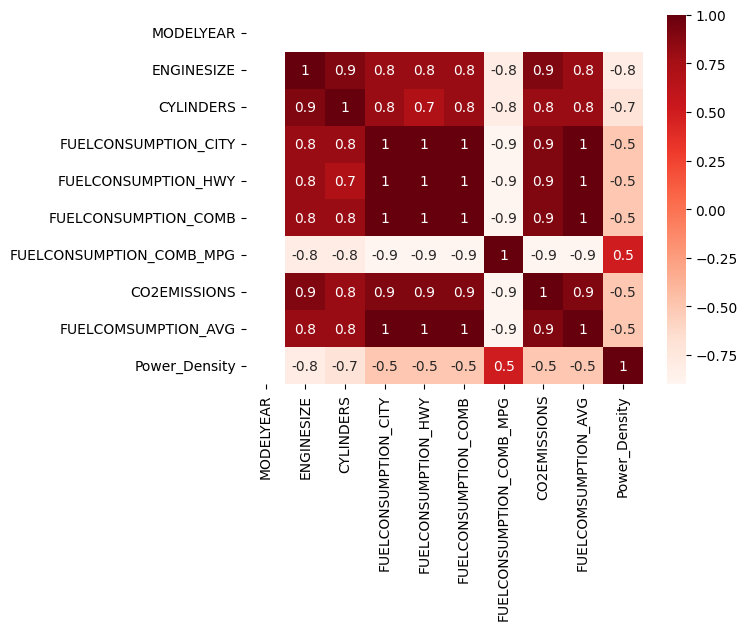

In [13]:
# veri görseleştirmek için çok yoğun kullanılan seaborn kütüphanesini yükleyelim
# pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# "dpi" per inch anlamına gelir. götüntü çöznürlüğünü belirler. daha yüksek DPI, daha net bir görsel oluşturur

plt.figure(dpi=100)

# seaborn kütüphanesinden gelen bir fonksiyondur ve matrix biçimindeki verileri renkli kutucuklara görselleştirir
sns.heatmap(
    np.round(df.corr(), 1),
    annot=True, # her kutunun korelasyon değerini yazdırır
    cmap='Reds' # renk paleti olrak kırmızı tonlarını kullanır
)

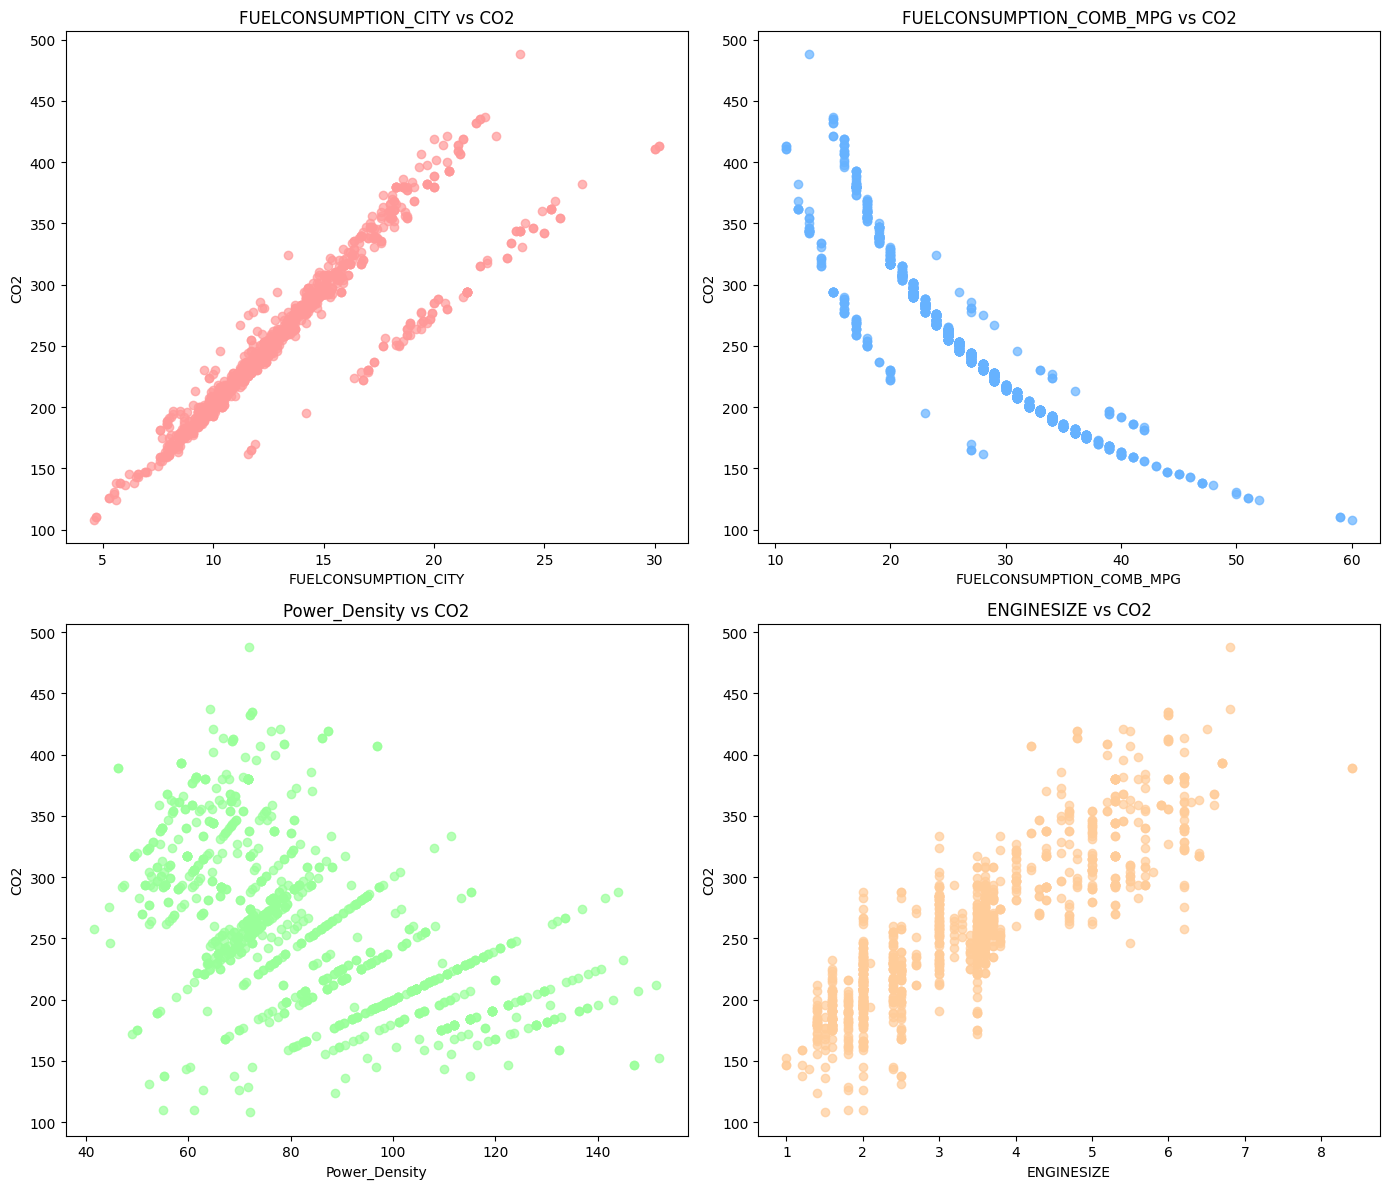

In [14]:
fig, axes = plt.subplots(2,2, figsize=(14, 12))
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#CC99FF', '#FF6666']

# ilk görsel FUELCONSUMPTION_CITY ile CO2EMISSIONS  (pozitif yönlü kuvvetli ilişki var)

axes[0,0].scatter(df['FUELCONSUMPTION_CITY'], df['CO2EMISSIONS'], c=colors[0], alpha=0.7)
axes[0,0].set_title('FUELCONSUMPTION_CITY vs CO2', fontsize=12)
axes[0,0].set_xlabel('FUELCONSUMPTION_CITY', fontsize=10)
axes[0,0].set_ylabel('CO2', fontsize=10)




# ikinci görsel FUELCONSUMPTION_COMB_MPG ile CO2EMISSIONS  (nagatif yönlü kuvvetli ilişki var)

axes[0,1].scatter(df['FUELCONSUMPTION_COMB_MPG'], df['CO2EMISSIONS'], c=colors[1], alpha=0.7)
axes[0,1].set_title('FUELCONSUMPTION_COMB_MPG vs CO2', fontsize=12)
axes[0,1].set_xlabel('FUELCONSUMPTION_COMB_MPG', fontsize=10)
axes[0,1].set_ylabel('CO2', fontsize=10)


# üçüncü görsel Power_Density ile CO2EMISSIONS  (nagatif yönlü orta kuvvetli ilişki var)

axes[1,0].scatter(df['Power_Density'], df['CO2EMISSIONS'], c=colors[2], alpha=0.7)
axes[1,0].set_title('Power_Density vs CO2', fontsize=12)
axes[1,0].set_xlabel('Power_Density', fontsize=10)
axes[1,0].set_ylabel('CO2', fontsize=10)

# dördüncü görsel Power_Density ile CO2EMISSIONS  (pozitif yönlü orta kuvvetli ilişki var)

axes[1,1].scatter(df['ENGINESIZE'], df['CO2EMISSIONS'], c=colors[3], alpha=0.7)
axes[1,1].set_title('ENGINESIZE vs CO2', fontsize=12)
axes[1,1].set_xlabel('ENGINESIZE', fontsize=10)
axes[1,1].set_ylabel('CO2', fontsize=10)

plt.tight_layout()

plt.show()


In [ ]:
#simple linear regression için bir kümülatif veri seti oluşturalım

cdf = df[['FUELCONSUMPTION_CITY', 'CO2EMISSIONS']]
cdf.head()

,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,9.9,196
2,6.0,136
3,12.7,255
4,12.1,244
5,11.9,230


## Verilerin Dağılımına Bakalaım
<i>Veri setimizdeki verilerin dağılımını ve çarpıklığını (skewness) inceliyoruz ki veri setindeki sütunlar için en iyi <b>normalizasyon</b> formülünü uygulayalım</i>

In [ ]:
# verilerin dağılımını inceleyelim
# p < 0.05 den küçükse normal dağılıma uymuyor
# p > 0.05 den büyükser normal dağılıma uyuyor

from scipy.stats.mstats import normaltest

for col in cdf.columns:
    # stat (statistik) değeri normal dağılımdan ne kadar saptığını yani uzaklaştığını gösteriyor
    stat, p = normaltest(cdf[col])
    print(f'{col} --> Test Statistic: {stat} | p-value: {p}\n')

    if p < 0.05:
        print(f'{col} normal dağılımına uymuyor...\n')
    else:
        print(f'{col} normal dağılımına uyuyor...\n')



FUELCONSUMPTION_CITY --> Test Statistic: 129.33045060780384 | p-value: 8.246116752977712e-29

FUELCONSUMPTION_CITY normal dağılımına uymuyor...

CO2EMISSIONS --> Test Statistic: 43.482724320126735 | p-value: 3.612820502350923e-10

CO2EMISSIONS normal dağılımına uymuyor...



In [17]:
# Veriler ne kadar çarpık onu saptayalım. Böylelikle verileri dönüştürürken kullanılacak en doğru fonksiyonları saptayacağız

from scipy.stats import skew

for col in cdf.columns:
    print(f'{col} çarpıklık (skewness): {skew(cdf[col]):.2f}\n')

# skewness > 1 --> veri daha çok sağa çarpık. Bu senaryoda Log ve box-cox dönüşümleri tercih edilir
# skewness ~ 0.5 ~ 1 orta derecede çarpıklık. Bu senaryoda karekök dönüşümü yapılır
# skewness < 0.5 ise veri normal dağılmıştır. Dönüşüm gerekmemektedir
    

FUELCONSUMPTION_CITY çarpıklık (skewness): 0.90

CO2EMISSIONS çarpıklık (skewness): 0.52



## Normalizasyon

### Normalize Yöntemleri Ne Zaman Kullanılır

+ Veri çok çarpık (skewed) dağılıma sahipse.
+ Aykırı değerler (outlier) varsa
+ Liner Model kullanılıyorsa (Lineer Regression, Logistic Regression)

### Normalizasyon Yöntemleri

+ **Square-Root Transformation:** *Orta seviye çarpıklığını azaltmak için kullanılır*
+ **Log (Log-Transformation):** *Orta ve yükesek seviyeli çarpıklıklar için  logaritma olarak pozitif çarpıklığı azaltır*
+ **Box-Cox:** *Pozitif değerlere sahip yüksek seviyeli çarpıklığı normal dağılıma yaklaştırır.*
+ **Yeo-Johnson:** *Yüksek çarpıklık için tercih edilir ve hem pozitif hem de negatif değerler için kullanılır.*

In [18]:
# log fonksiyonu kullanarak verilerimizi normal dağıttık
df_log = np.log(cdf)
df_log.head()

,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.292535,5.278115
2,1.791759,4.912655
3,2.541602,5.541264
4,2.493205,5.497168
5,2.476538,5.438079


In [19]:
# Yukarıda log fonksiyonu kullanarak verilerimizi normal dağıttık. Şimdi çarpıklık ne durumda onu kontrol ediyoruz

for col in df_log.columns:
    print(f'{col} çarpıklık (skewness): {skew(df_log[col]):.2f}\n')

FUELCONSUMPTION_CITY çarpıklık (skewness): 0.03

CO2EMISSIONS çarpıklık (skewness): -0.09



In [20]:
# karekök dönüşümü yapalım

df_sqrt = np.sqrt(cdf)

for col in df_sqrt.columns:
    print(f'{col} çarpıklık (skewness): {skew(df_sqrt[col]):.2f}\n')

FUELCONSUMPTION_CITY çarpıklık (skewness): 0.47

CO2EMISSIONS çarpıklık (skewness): 0.22



In [21]:
from scipy.stats import boxcox

df_box = cdf.copy()

for col in cdf.columns:
    df_box[col], _ = boxcox(cdf[col])


for col in df_box.columns:
    print(f'{col} çarpıklık (skewness): {skew(df_box[col]):.2f}\n')
    

FUELCONSUMPTION_CITY çarpıklık (skewness): -0.00

CO2EMISSIONS çarpıklık (skewness): -0.00



In [22]:
# veriyi normal dağıttık şimdi tekrar corelasyona bakalım
# veri normal dağılımdan önce FUELCONSUMPTION_CITY ile CO2EMISSIONS arasındaki korelasyon 0.898012 idi

df_box.corr()['CO2EMISSIONS']

FUELCONSUMPTION_CITY    0.934153
CO2EMISSIONS            1.000000
Name: CO2EMISSIONS, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_box, train_size=0.8, random_state = 42)
print(f'Train Set: {train_df.shape}\nTest Set: {test_df.shape}')

Train Set: (852, 2)
Test Set: (214, 2)


In [24]:
from sklearn import linear_model

regression = linear_model.LinearRegression()

train_x = np.asanyarray(train_df[['FUELCONSUMPTION_CITY']])
train_y = np.asanyarray(train_df[['CO2EMISSIONS']])

regression.fit(train_x, train_y)

coefficient = regression.coef_[0][0]
intercept = regression.intercept_[0]

print(f'Coefficient: {coefficient:.2f}\n')
print(f'Intercept: {intercept:.2f}\n')


Coefficient: 1.73

Intercept: 3.85



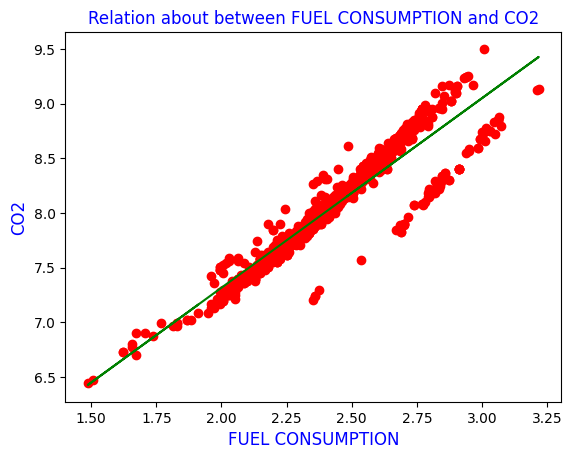

In [25]:
plt.scatter(train_df['FUELCONSUMPTION_CITY'], train_df['CO2EMISSIONS'], c='r')
plt.plot(train_x, coefficient*train_x + intercept, c='green')
plt.title(label='Relation about between FUEL CONSUMPTION and CO2', c='b', fontsize=12)
plt.xlabel(xlabel = 'FUEL CONSUMPTION', c='b', fontsize=12)
plt.ylabel(ylabel = 'CO2', c='b', fontsize=12)
plt.show()

In [26]:
test_x = np.asarray(train_df[['FUELCONSUMPTION_CITY']])
test_y = np.asarray(train_df[['CO2EMISSIONS']])

test_prediction = regression.predict(test_x)

result_df = pd.DataFrame(
    {
        'Real Values' : test_y.flatten(),
        'Estimated Values' : test_prediction.flatten()
    }
)

result_df.head()

,Real Values,Estimated Values
0,8.150171,8.155447
1,9.099492,8.877551
2,8.077856,8.647231
3,7.400449,7.446548
4,7.400449,7.427707


In [27]:
# Modelimizi train ettik. Yukarıda test ettik
# Test sonuçşarı yani estimate ile veri setinde olan real değerleri karşılaştırdık
# Şimdi metrikler uygulayarak modelimizi daha profesyonel bir şekilde test edelim

from sklearn.metrics import r2_score, mean_absolute_error

# r2 sonucu  ~ -1, 0,  1 çıkabilir
# 1 e yaklaşırsa o kadar başarılı olduğu anlamına gelir
# 0 yakınsa başarısızlık anlamına gelir
# -1 yakınsa tam anlamıyla çok kötü sonuç anlamına gelir

r2_result = r2_score(test_prediction, test_y)
print(f'R2 Score {r2_result:.2f}')

mae = np.mean(np.absolute(test_prediction - test_y))
print(f'Mean Absolute Error {mae:.2f}')

rsq = np.mean((test_prediction - test_y) ** 2)
print(f'Residual Sum of Square {rsq:.2f}')


R2 Score 0.85
Mean Absolute Error 0.12
Residual Sum of Square 0.03
